In [1]:
# from https://cospar.readthedocs.io/en/latest/20210121_all_hematopoietic_data_v3.html
import cospar as cs
import numpy as np
import anndata as ad

In [7]:
cs.logging.print_version()
cs.settings.verbosity = 2
cs.settings.data_path = "/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup4/LARRY_data"  # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path = "/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup4/LARRY_figure"  # A relative path to save figures. If not existed before, create a new one.

Running cospar 0.4.1 (python 3.9.20) on 2024-10-16 23:48.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [2]:
adata = ad.read_h5ad("/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup4/Writeup4_cospar-LARRY.h5ad")
adata

AnnData object with n_obs × n_vars = 41093 × 2000
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'Time point', 'clone_id', 'n_genes'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Tmap_cell_id_t1', 'Tmap_cell_id_t2', 'available_map', 'clonal_cell_id_t1', 'clonal_cell_id_t2', 'clonal_time_points', 'data_des', 'hvg', 'intraclone_transition_map', 'log1p', 'neighbors', 'pca', 'sp_idx', 'time_ordering', 'transition_map'
    obsm: 'X_clone', 'X_emb', 'X_pca'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs['time_info']

d6_2_2:GCGTGCAAAGAAGTTA        6
d6_2_2:AAGGGACCCTCGATGC        6
d6_2_2:CGTACCGAAGCGCCTT        6
d6_2_2:CCGTAGCTAGGCAGTT        6
d6_2_2:TAGGCTTTCGTGGATA        6
                              ..
LSK_d6_1_3:CTGTGACCTGCTATTT    6
LSK_d6_1_3:AGGCGTTTCCTATTCA    6
LSK_d6_1_3:CGTGCAACTGGCCTGT    6
LSK_d6_1_3:CCCTTGCAAGTGAAAG    6
LSK_d6_1_3:TCCGCTGTGACAGATA    6
Name: time_info, Length: 41093, dtype: category
Categories (3, object): ['2', '4', '6']

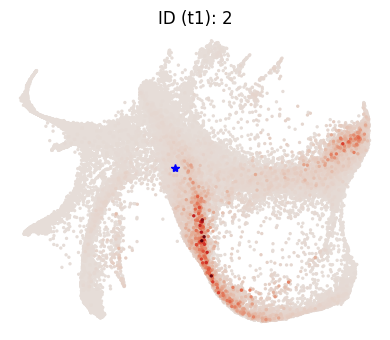

In [5]:
selected_state_id_list = [2]

cs.pl.single_cell_transition(
    adata,
    selected_state_id_list=selected_state_id_list,
    color_bar=False,
    source="transition_map",
    map_backward=False,
)

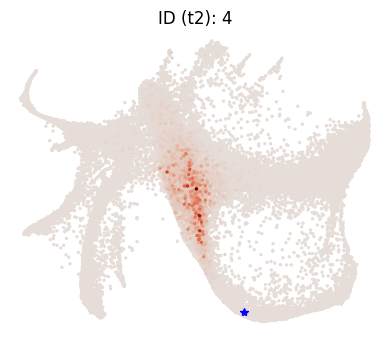

In [6]:
selected_state_id_list = [4]
cs.pl.single_cell_transition(
    adata,
    selected_state_id_list=selected_state_id_list,
    color_bar=False,
    source="transition_map",
    map_backward=True,
)

/home/users/kzlin/miniconda3/envs/cospar/lib/python3.9/site-packages/cospar/tool/_utils.py:235: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state_annote[cell_id_t2] == yy


Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_Monocyte']


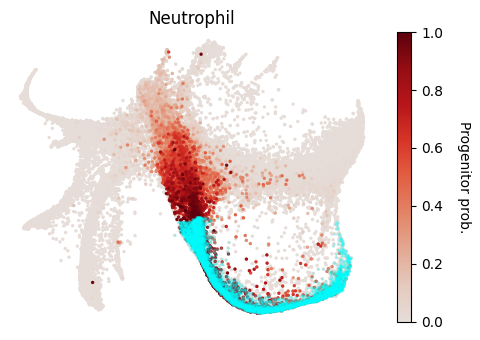

In [8]:
cs.tl.fate_map(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    map_backward=True,
)
cs.pl.fate_map(
    adata,
    selected_fates=["Neutrophil"],
    source="transition_map",
    plot_target_state=True,
    show_histogram=False,
)

In [9]:
cs.tl.fate_bias(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    pseudo_count=0,
    sum_fate_prob_thresh=0.1,
)

Results saved at adata.obs['fate_map_transition_map_Neutrophil']
Results saved at adata.obs['fate_map_transition_map_Monocyte']
Results saved at adata.obs['fate_bias_transition_map_Neutrophil*Monocyte']


/home/users/kzlin/miniconda3/envs/cospar/lib/python3.9/site-packages/cospar/tool/_utils.py:235: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state_annote[cell_id_t2] == yy


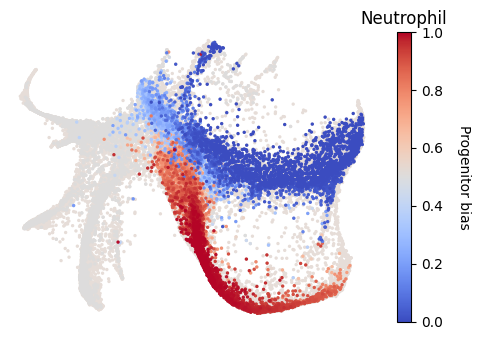

In [12]:
cs.pl.fate_bias(
    adata,
    selected_fates=["Neutrophil", "Monocyte"],
    source="transition_map",
    plot_target_state=False,
    selected_times=["4"],
)

In [10]:
adata

AnnData object with n_obs × n_vars = 41093 × 2000
    obs: 'Library', 'Cell barcode', 'time_info', 'Starting population', 'state_info', 'Well', 'SPRING-x', 'SPRING-y', 'Time point', 'clone_id', 'n_genes', 'fate_map_transition_map_Neutrophil', 'fate_map_transition_map_Monocyte', 'fate_bias_transition_map_Neutrophil*Monocyte'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Tmap_cell_id_t1', 'Tmap_cell_id_t2', 'available_map', 'clonal_cell_id_t1', 'clonal_cell_id_t2', 'clonal_time_points', 'data_des', 'hvg', 'intraclone_transition_map', 'log1p', 'neighbors', 'pca', 'sp_idx', 'time_ordering', 'transition_map', 'fate_map_params', 'fate_potency_tmp', 'fate_bias_params'
    obsm: 'X_clone', 'X_emb', 'X_pca'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'

In [14]:
adata.obs

,Library,Cell barcode,time_info,Starting population,state_info,Well,SPRING-x,SPRING-y,Time point,clone_id,n_genes,fate_map_transition_map_Neutrophil,fate_map_transition_map_Monocyte,fate_bias_transition_map_Neutrophil*Monocyte
d6_2_2:GCGTGCAAAGAAGTTA,d6_2_2,GCGTGCAA-AGAAGTTA,6,Lin-Kit+Sca1-,Undifferentiated,2,411.496,-96.190,6,573,4050,NaN,NaN,0.5
d6_2_2:AAGGGACCCTCGATGC,d6_2_2,AAGGGACC-CTCGATGC,6,Lin-Kit+Sca1-,Undifferentiated,2,-587.462,-306.925,6,1440,3139,NaN,NaN,0.5
d6_2_2:CGTACCGAAGCGCCTT,d6_2_2,CGTACCGA-AGCGCCTT,6,Lin-Kit+Sca1-,Monocyte,2,1429.805,-429.300,6,394,2403,NaN,NaN,0.5
d6_2_2:CCGTAGCTAGGCAGTT,d6_2_2,CCGTAGCT-AGGCAGTT,6,Lin-Kit+Sca1-,Undifferentiated,2,-1169.594,362.010,6,1972,1608,NaN,NaN,0.5
d6_2_2:TAGGCTTTCGTGGATA,d6_2_2,TAGGCTTT-CGTGGATA,6,Lin-Kit+Sca1-,Neutrophil,2,1236.039,-2113.013,6,1450,1667,NaN,NaN,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LSK_d6_1_3:CTGTGACCTGCTATTT,LSK_d6_1_3,CTGTGACC-TGCTATTT,6,Lin-Kit+Sca1+,Undifferentiated,1,307.879,-27.451,6,4999,2432,NaN,NaN,0.5
LSK_d6_1_3:AGGCGTTTCCTATTCA,LSK_d6_1_3,AGGCGTTT-CCTATTCA,6,Lin-Kit+Sca1+,Undifferentiated,1,-1074.917,441.981,6,12,1876,NaN,NaN,0.5
LSK_d6_1_3:CGTGCAACTGGCCTGT,LSK_d6_1_3,CGTGCAAC-TGGCCTGT,6,Lin-Kit+Sca1+,Undifferentiated,1,247.634,281.262,6,267,1434,NaN,NaN,0.5
LSK_d6_1_3:CCCTTGCAAGTGAAAG,LSK_d6_1_3,CCCTTGCA-AGTGAAAG,6,Lin-Kit+Sca1+,Neutrophil,1,353.734,-980.246,6,3534,1252,NaN,NaN,0.5


In [16]:
# Count non-NaN values in the specified column
non_nan_count = adata.obs['fate_map_transition_map_Neutrophil'].notna().sum()

print(f"Number of non-NaN values: {non_nan_count}")

Number of non-NaN values: 14012


In [17]:
# Count non-NaN values in the specified column
non_nan_count = adata.obs['fate_map_transition_map_Monocyte'].notna().sum()

print(f"Number of non-NaN values: {non_nan_count}")

Number of non-NaN values: 14012


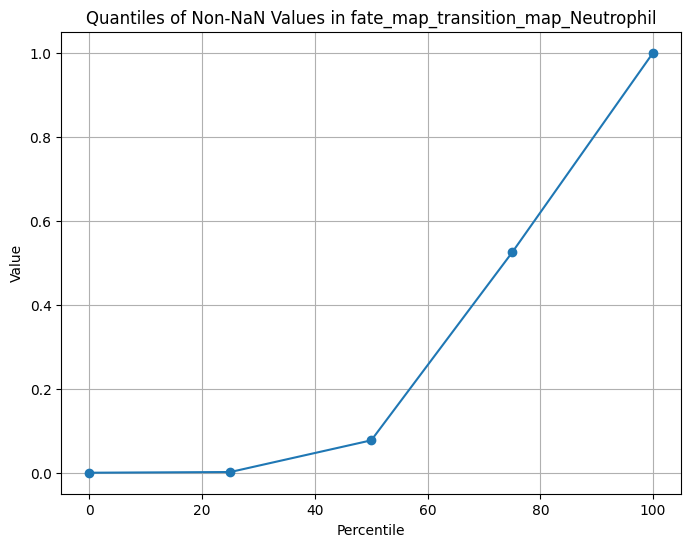

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Extract non-NaN values
non_nan_values = adata.obs['fate_map_transition_map_Neutrophil'].dropna()

# Compute quantiles
quantiles = np.percentile(non_nan_values, [0, 25, 50, 75, 100])

# Plot the quantiles
plt.figure(figsize=(8, 6))
plt.plot([0, 25, 50, 75, 100], quantiles, marker='o', linestyle='-')
plt.title('Quantiles of Non-NaN Values in fate_map_transition_map_Neutrophil')
plt.xlabel('Percentile')
plt.ylabel('Value')
plt.grid(True)
plt.show()

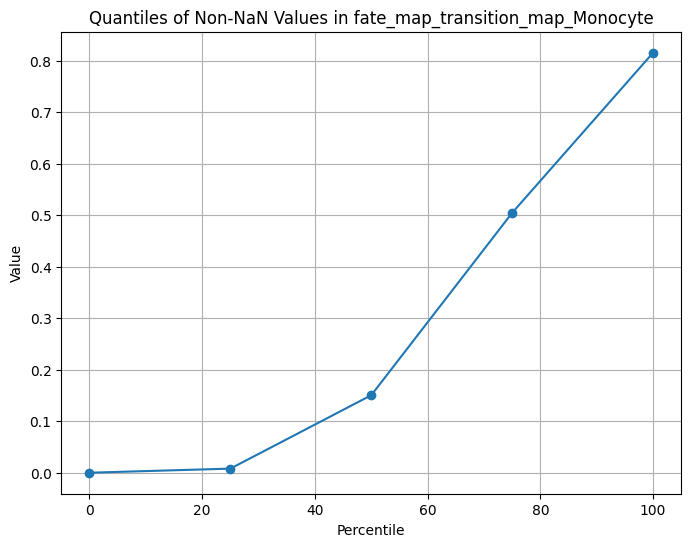

In [20]:
# Extract non-NaN values
non_nan_values = adata.obs['fate_map_transition_map_Monocyte'].dropna()

# Compute quantiles
quantiles = np.percentile(non_nan_values, [0, 25, 50, 75, 100])

# Plot the quantiles
plt.figure(figsize=(8, 6))
plt.plot([0, 25, 50, 75, 100], quantiles, marker='o', linestyle='-')
plt.title('Quantiles of Non-NaN Values in fate_map_transition_map_Monocyte')
plt.xlabel('Percentile')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [21]:
# Save adata.obs to a CSV file
adata.obs.to_csv('/home/users/kzlin/kzlinlab/projects/scContrastiveLearn/out/kevin/Writeup4/Writeup4_cospar-LARRY_postprocess_adata-obs.csv', index=True)
